## Loading Package

In [1]:
from flask import Flask, request

# LINE BOT API related
from linebot import LineBotApi, WebhookHandler
from linebot.models import MessageEvent, TextMessage, TextSendMessage

# others
import requests, json
from datetime import datetime, timedelta
from dotenv import dotenv_values

In [2]:
access_token = dotenv_values('.env')['LINE_ACCESS_TOKEN']
channel_secret = dotenv_values('.env')['LINE_CHANELL_SECRET']

## Trying to print the data we will receive

In [4]:
app = Flask(__name__)

@app.route("/", methods=['POST'])
def linebott():
    body = request.get_data(as_text=True)
    try:
        line_bot_api = LineBotApi(access_token)             # Verify if the token is correct
        handler = WebhookHandler(channel_secret)            # Verify if the secret is correct
        signature = request.headers['X-Line-Signature']     # Include the return headers
        handler.handle(body, signature)                     # Bind the message and signature

        json_data = json.loads(body)
        reply_token = json_data['events'][0]['replyToken']
        user_id = json_data['events'][0]['source']['userId']     # Get the user ID for push message
        print(json_data)

    except Exception as e:
        print('error')
        print('reason:', e)
    return 'OK'

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
C:\Users\EricMiao\AppData\Local\Temp\ipykernel_10196\3770624354.py:7: LineBotSdkDeprecatedIn30: Call to deprecated class LineBotApi. (Use v3 class; linebot.v3.<feature>. See https://github.com/line/line-bot-sdk-python/blob/master/README.rst for more details.) -- Deprecated since version 3.0.0.
  line_bot_api = LineBotApi(access_token)             # Verify if the token is correct
C:\Users\EricMiao\AppData\Local\Temp\ipykernel_10196\3770624354.py:8: LineBotSdkDeprecatedIn30: Call to deprecated class WebhookHandler. (Use 'from linebot.v3.webhook import WebhookHandler' instead. See https://github.com/line/line-bot-sdk-python/blob/master/README.rst for more details.) -- Deprecated since version 3.0.0.
  handler = WebhookHandler(channel_secret)            # Verify if the secret is correct
127.0.0.1 - - [14/Jan/2024 16:22:53] "POST / HTTP/1.1" 200 -


error
reason: list index out of range


127.0.0.1 - - [14/Jan/2024 16:23:03] "POST / HTTP/1.1" 200 -


{'destination': 'U4a1b36783e217b8b4fcdb2a18abd32f5', 'events': [{'type': 'message', 'message': {'type': 'text', 'id': '490547809523597651', 'quoteToken': 'uBB6QEmYxB0siApq2wUl0XO5cudBMomk2owhdAcOx4H7OmPG5XowT07kcVT3bi4xx2uJK75JpTN2iRSIf9njleyM5Pjix6Brr3ygJ3K0lQ9I60coerLKKwqAjC9XbTtzKTYjtalC5VTGFCFT9FqVlQ', 'text': '你好啊'}, 'webhookEventId': '01HM3H2C4S4QSBP1X7HP4A5P96', 'deliveryContext': {'isRedelivery': False}, 'timestamp': 1705220583479, 'source': {'type': 'user', 'userId': 'U5118169534cb5dc073b0c8e3f7ee5751'}, 'replyToken': 'd9f1213893864835836d98be58b893dc', 'mode': 'active'}]}


In [5]:
current_time = datetime.now()
one_hour_ago = current_time - timedelta(hours=1)
rounded_time = one_hour_ago.replace(minute=0, second=0, microsecond=0)
formatted_time = rounded_time.strftime("%Y%m%d%H%M")

## Adding condition to detect whether user ask for weather map

In [6]:
# LINE 回傳圖片函式
def reply_image(msg, rk, token):
    headers = {'Authorization':f'Bearer {token}','Content-Type':'application/json'}    
    body = {
    'replyToken':rk,
    'messages':[{
          'type': 'image',
          'originalContentUrl': msg,
          'previewImageUrl': msg
        }]
    }
    req = requests.request('POST', 'https://api.line.me/v2/bot/message/reply', headers=headers, data=json.dumps(body).encode('utf-8'))
    print(req.text)

# LINE 回傳訊息函式
def reply_message(msg, rk, token):
    headers = {'Authorization':f'Bearer {token}','Content-Type':'application/json'}
    body = {
    'replyToken':rk,
    'messages':[{
            "type": "text",
            "text": msg
        }]
    }
    req = requests.request('POST', 'https://api.line.me/v2/bot/message/reply', headers=headers, data=json.dumps(body).encode('utf-8'))
    print(req.text)

In [7]:
app = Flask(__name__)

@app.route("/", methods=['POST'])
def linebott():
    body = request.get_data(as_text=True)
    try:
        line_bot_api = LineBotApi(access_token)             # Verify if the token is correct
        handler = WebhookHandler(channel_secret)            # Verify if the secret is correct
        signature = request.headers['X-Line-Signature']     # Include the return headers
        handler.handle(body, signature)                     # Bind the message and signature

        json_data = json.loads(body)
        reply_token = json_data['events'][0]['replyToken']
        user_id = json_data['events'][0]['source']['userId']     # Get the user ID for push message
        print(json_data)
        if 'message' in json_data['events'][0]:
            if json_data['events'][0]['message']['type'] == 'text':
                text = json_data['events'][0]['message']['text']
                if text == '雷達回波圖' or text == '雷達圖':    # if we received 雷達回波圖 or 雷達圖
                    # 傳送雷達回波圖(加上時間戳記)
                    current_time = datetime.now()
                    one_hour_ago = current_time - timedelta(hours=1)
                    rounded_time = one_hour_ago.replace(minute=0, second=0, microsecond=0)
                    formatted_time = rounded_time.strftime("%Y%m%d%H%M")
                    png = f'https://www.cwa.gov.tw/Data/radar/CV1_3600_{formatted_time}.png'
                    reply_image(png, reply_token, access_token)
                else:
                    reply_message(text, reply_token, access_token)

    except Exception as e:
        print('error')
        print('reason:', e)
    return 'OK'

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
C:\Users\EricMiao\AppData\Local\Temp\ipykernel_10196\2432480041.py:7: LineBotSdkDeprecatedIn30: Call to deprecated class LineBotApi. (Use v3 class; linebot.v3.<feature>. See https://github.com/line/line-bot-sdk-python/blob/master/README.rst for more details.) -- Deprecated since version 3.0.0.
  line_bot_api = LineBotApi(access_token)             # Verify if the token is correct
C:\Users\EricMiao\AppData\Local\Temp\ipykernel_10196\2432480041.py:8: LineBotSdkDeprecatedIn30: Call to deprecated class WebhookHandler. (Use 'from linebot.v3.webhook import WebhookHandler' instead. See https://github.com/line/line-bot-sdk-python/blob/master/README.rst for more details.) -- Deprecated since version 3.0.0.
  handler = WebhookHandler(channel_secret)            # Verify if the secret is correct


{'destination': 'U4a1b36783e217b8b4fcdb2a18abd32f5', 'events': [{'type': 'message', 'message': {'type': 'text', 'id': '490547858647810370', 'quoteToken': 'cy5wvsMeDQj4vLegb4dWenW9rCcOpHR46_WWLg2eamYRszN4p2leoTfwbu6CQgrbjJ8O7kvjlbe8UD4Qjj12UI7wJITPKWKdx8ZkTOzNXQFp8iO5Y7svYNTaoyCT8frRjbsVbanEzaeGvz0IgRTVrA', 'text': '雷達圖'}, 'webhookEventId': '01HM3H3901NGSABM627AG5GGC1', 'deliveryContext': {'isRedelivery': False}, 'timestamp': 1705220612613, 'source': {'type': 'user', 'userId': 'U5118169534cb5dc073b0c8e3f7ee5751'}, 'replyToken': 'ad25618a23c54081af5c4f5d8fdb46a5', 'mode': 'active'}]}


127.0.0.1 - - [14/Jan/2024 16:23:33] "POST / HTTP/1.1" 200 -


{"sentMessages":[{"id":"490547860577452035","quoteToken":"XpWWk-n2_D-eJhzgNScZ0AmSowsDLh8laJpX71voV5kUrtP4S1BmnaOq2u5ghr0XRaf6RyyKnnjke6twU4vdnWw3oIj0jRzx08PE6XV_d1ls0P62MPDC-OYV7dVjRjlY6VK2nz8YN5NxrdBvGWsOjA"}]}


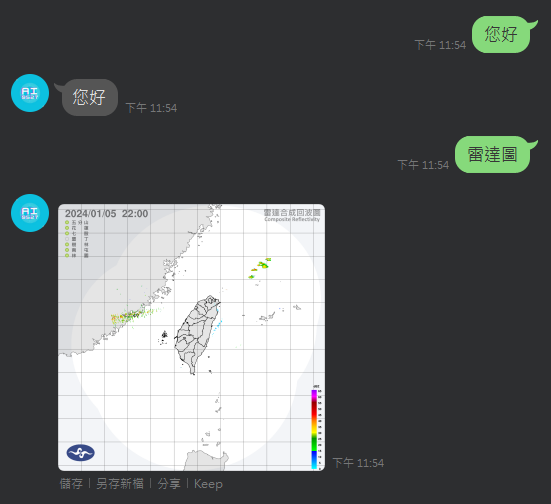

As of now, the chatbot is capable of responding with a radar chart by sending the specific command "雷達圖", depicting the radar chart for the previous hourly data.